## Task 1: Data Exploration and House Price prediction in 2 Different Scenarios


## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

Given sales dataset of King County, USA contains data for 221,600 house sales and using this dataset the management of Deep AI put forward two business requirements of exploring the datasets and developing various machine learning models in different scenarios to predict house prices. The dataset contains information about the property, its sale date and region including number of bedrooms, bathrooms, house condition, built year, year of renovation, square feet areas above and basement, zipcode alongwith latitude and longitude. The first business requirement deals with building two models, a linear regression model and a neural network model, and comparing their performances in estimation of house prices. Second requirement focused on converting sales prices above 450,000 USD as high prices and rest as low prices, and building two classification models to predict whether a house sale would be a high price sale or a low price sale. Experiments are performed on the neural network models with various activation functions like tanh, relu, softplus and varied optimisors including Nadam, RMSprop, Adam and Adadelta with hidden layers ranging from 1 to 6.  With the linear regression model 72% variation in the house prices can be explained by the model and on an average the prices after prediction varied by 180,000 USD compared to their actual sale price. With the neural network model, 87% variation in the house prices could be explained and the average difference between the predicted price and actual price is 76,000. The second business requirement deals with classification and is addressed with logistic regression and neural network models. Using the logistic regression model, 84% of the sale prices were correctly classified as high and low and using the neural network model, 90% prices were correctly categorised as high and low. For the logistic regression model, kappa came out to be 67% and for the neural network model it was 79%. Better the kappa, more reliable is the model. Kappa defines as the prediction to not just be "by chance". There is a very significant difference in the performance of the model using neural network compared to the linear regression or logistic regression model because neural network is like a " bunch of linear regression models". It holds the power of a lot of linear regression models working together.

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

The data pre-processing involved identification and removal of duplicates and null values in the dataset because neural network model can't work with dataset that contains null values and having duplicate records would just cloud the judgement. The date column was separated into day, month and year columns because date in its normal format can't be utilised, and neural network needs numerical data as well. id and date column were removed after this because they had no statistical significance. Regression models and classification models don't perform well with outliers and multicollinearity. They are sensitive to outliers. After careful consideration using the boxplots, not all outliers were removed because it lead to a lot of data loss which was not good for model training. The predictors having Variance Inflation Factor>=5  showed very high degree of collinearity and they were 'sqft_basement','sqft_above','sqft_living15' and they were removed from the dataset.


In [ ]:
#Mounting the drive and loading the file
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


{}

In [ ]:
import pandas as pd
house_price= pd.read_csv('Part1_house_price.csv')
print("Shape before removing duplicates:", house_price.shape)
house_price=house_price.drop_duplicates()
print("Shape after removing duplicates:",house_price.shape)
#Checking for null values
print("\nSum of null values:")
house_price.isnull().sum().sort_values(ascending=False)

Shape before removing duplicates: (21613, 21)
Shape after removing duplicates: (21613, 21)

Sum of null values:


id               0
grade            0
sqft_living15    0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
condition        0
date             0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
price            0
sqft_lot15       0
dtype: int64

In [ ]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
#Checking first 5 rows of the data
house_price.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Convert the date column to a pandas datetime object
house_price['date'] = pd.to_datetime(house_price['date'], format='%Y%m%dT%H%M%S')

# Create separate columns for year, month, and day
house_price['year'] = house_price['date'].dt.year
house_price['month'] = house_price['date'].dt.month
house_price['day'] = house_price['date'].dt.day
house_price.drop(columns=['date'], inplace=True)

In [ ]:
house_price.drop(columns=['id'], inplace=True)

In [ ]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [ ]:
house_price.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423,15.688197
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308,8.635063
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,8.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,16.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000,23.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,31.000000


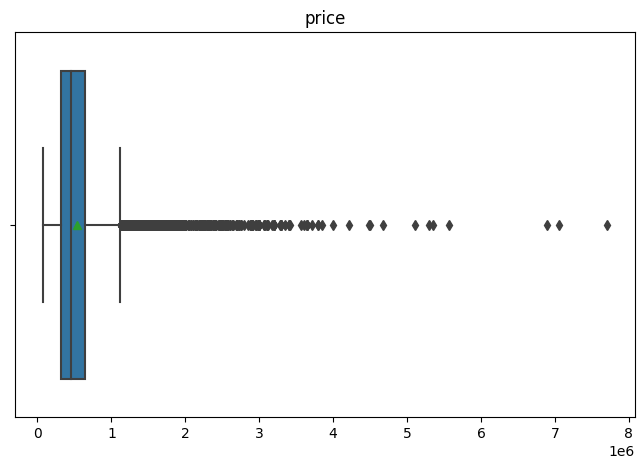

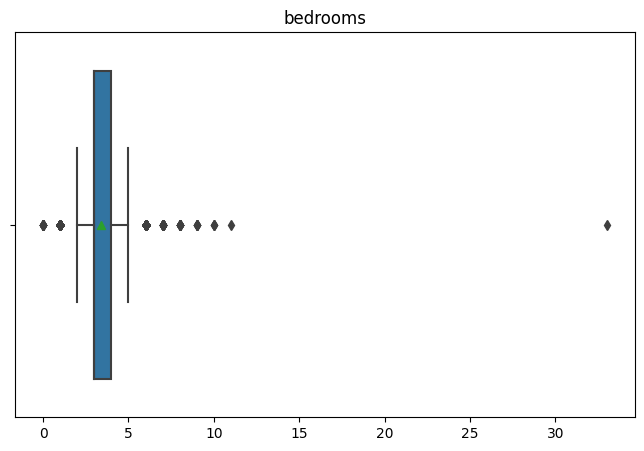

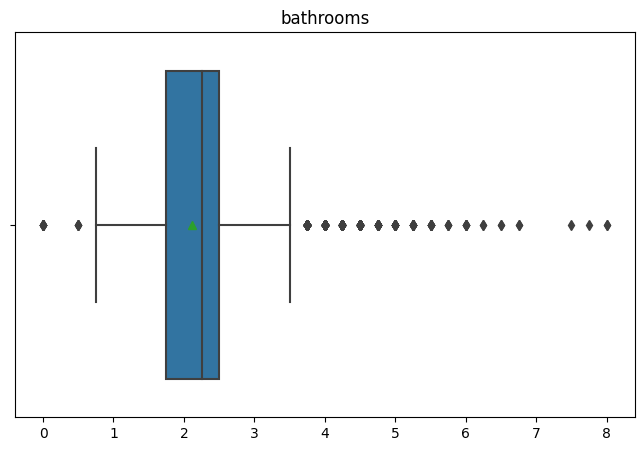

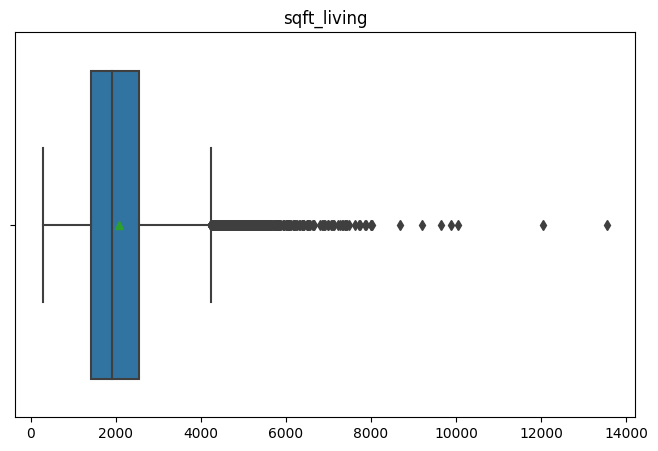

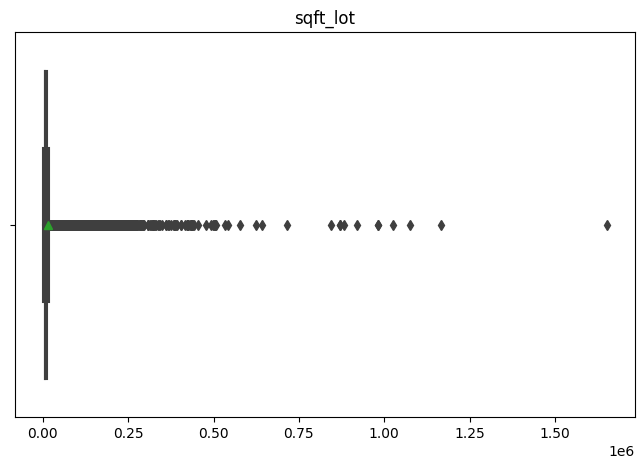

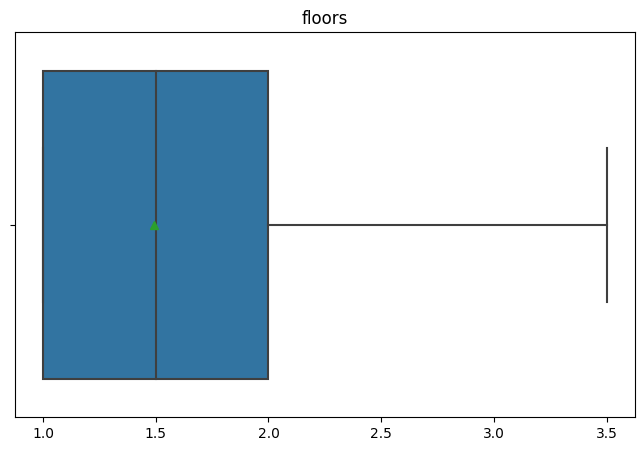

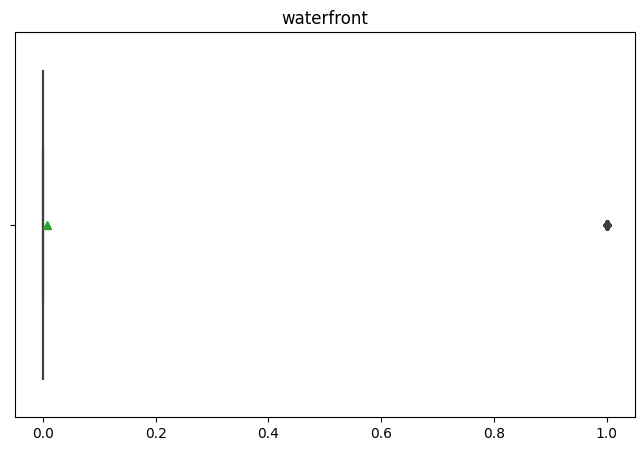

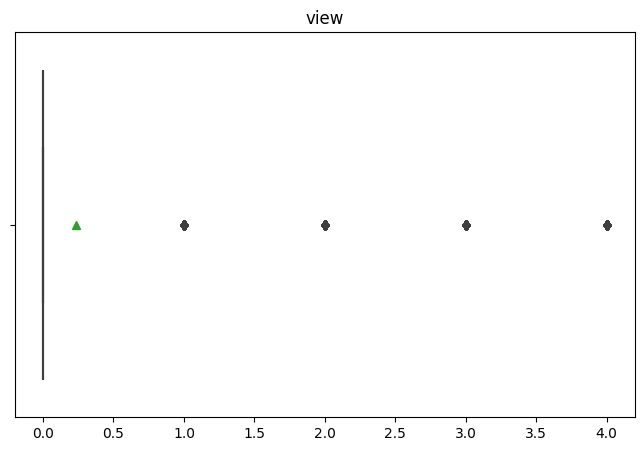

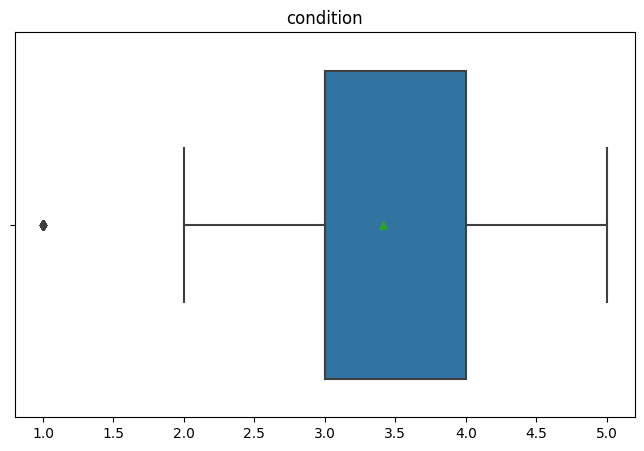

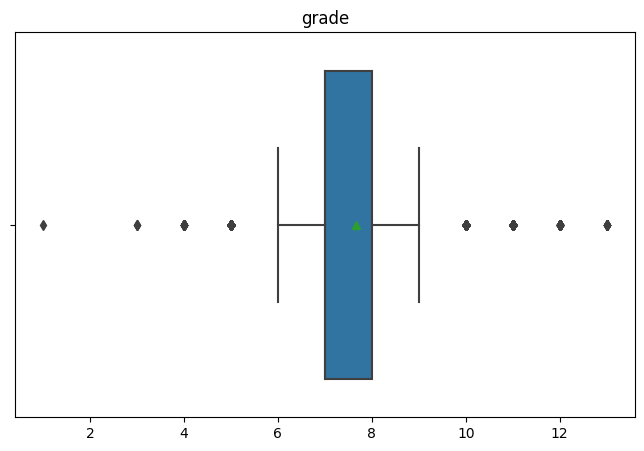

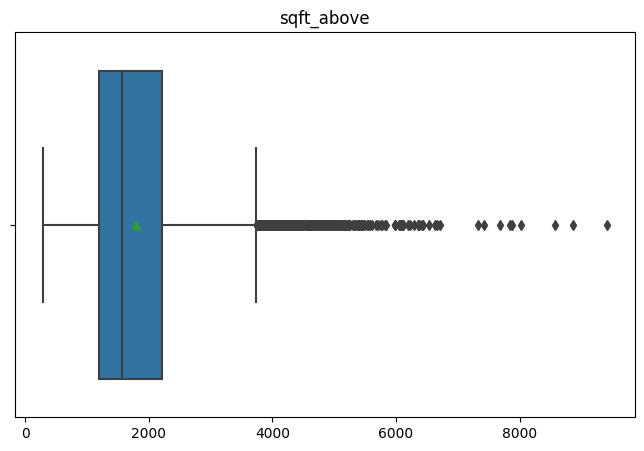

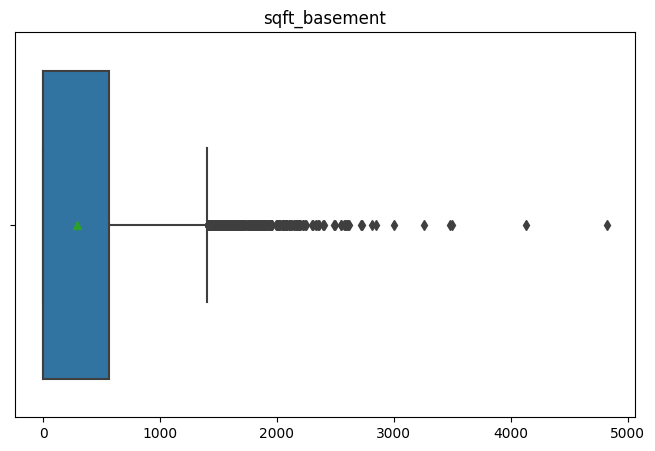

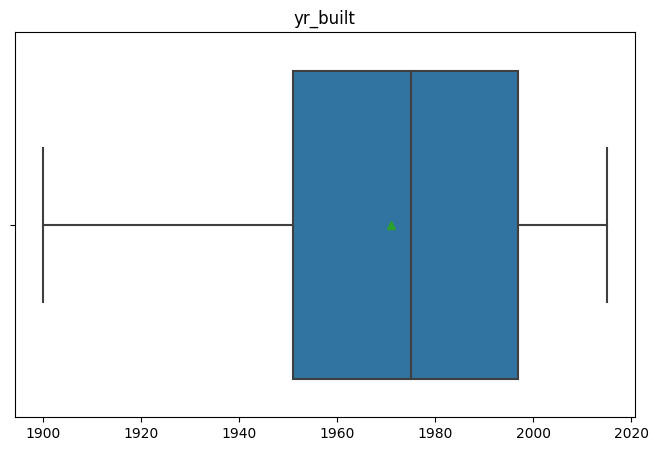

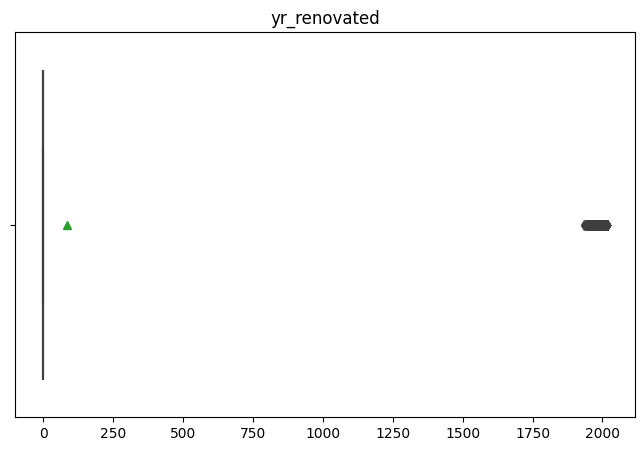

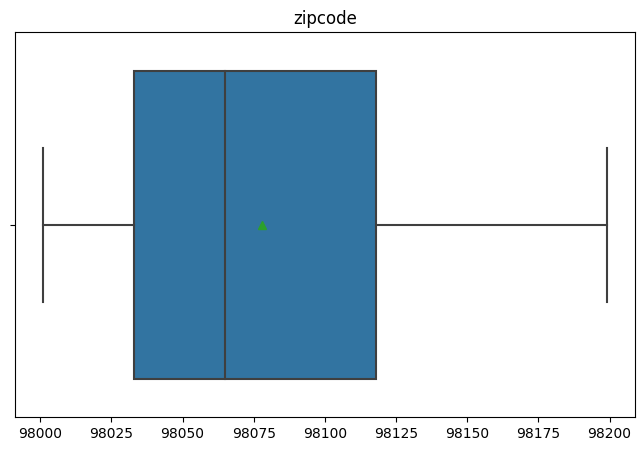

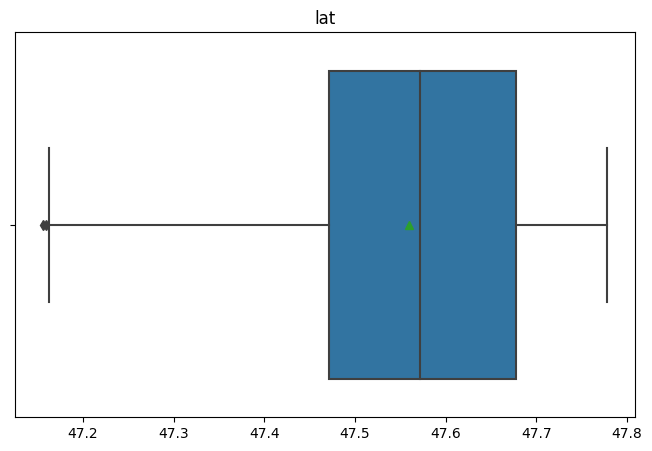

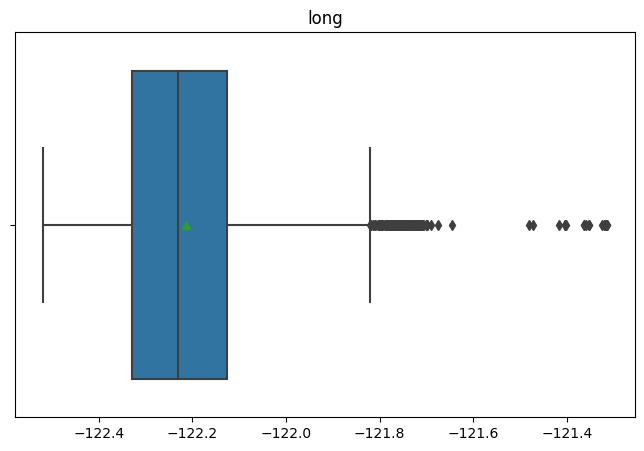

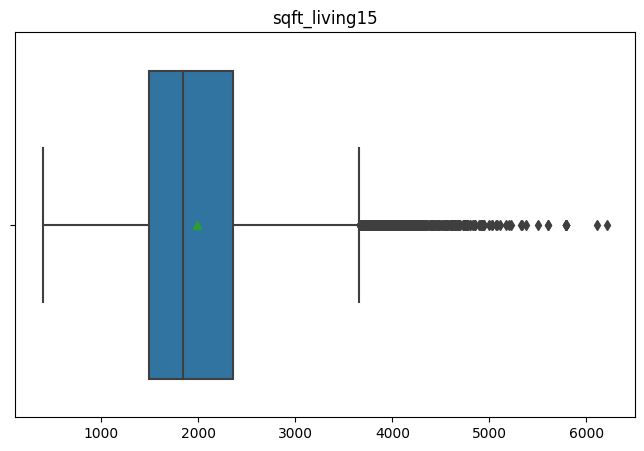

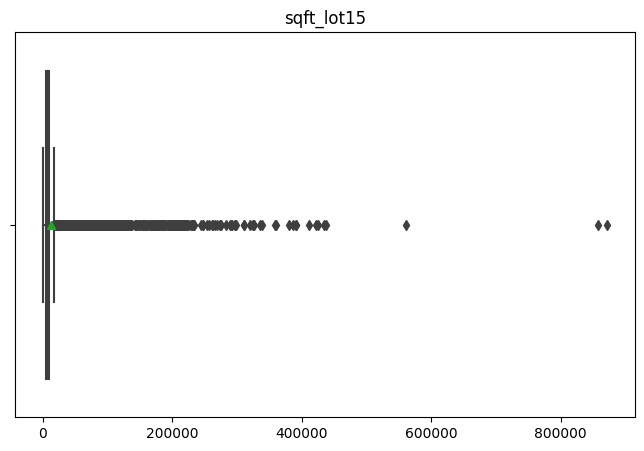

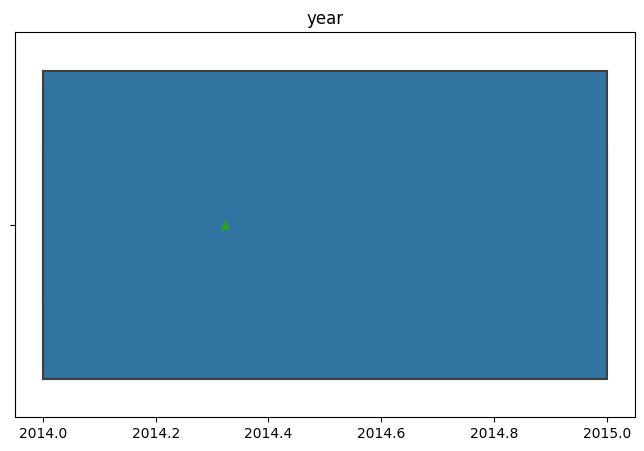

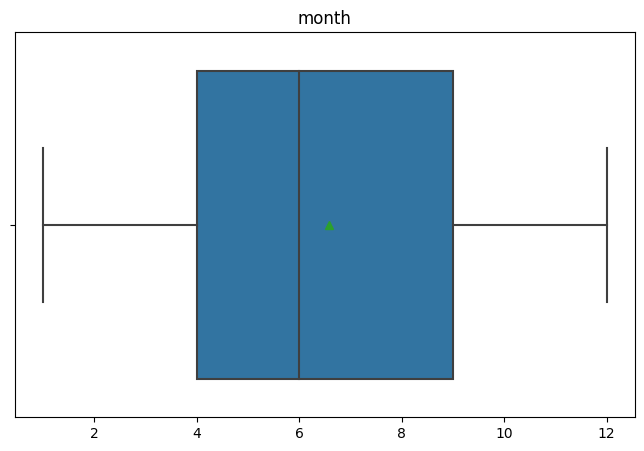

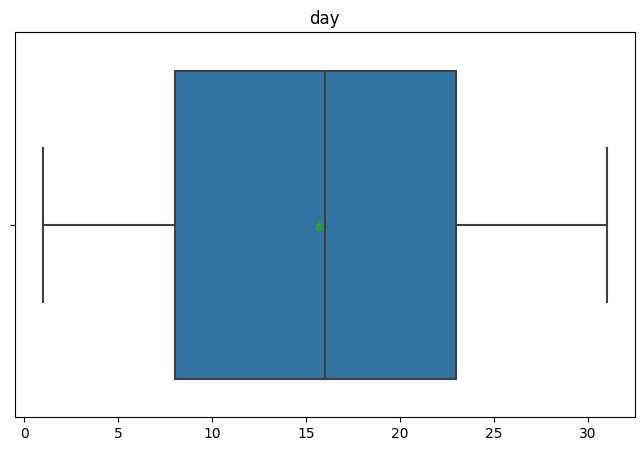

In [ ]:
#Plotting box plots to identify outliers
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
numerical_columns = house_price.select_dtypes(include=['float64', 'int64']).columns
# Set the size of the individual plots
plot_width, plot_height = 8, 5

# Loop through each numerical column and create boxplot
for col in numerical_columns:
    plt.figure(figsize=(plot_width, plot_height))
    sns.boxplot(data=house_price, x=col, showmeans=True)
    plt.title(col)
    plt.xlabel('')
    plt.show()

In [ ]:
#Removing outliers
house_price = house_price.drop(house_price[house_price['bedrooms'] == 33].index)
house_price=house_price.drop(house_price[house_price['price'] >= 4000000].index)
house_price = house_price.drop(house_price[house_price['sqft_living'] >= 10000].index)
house_price = house_price.drop(house_price[house_price['sqft_lot'] >= 1000000].index)
house_price = house_price.drop(house_price[(house_price['yr_renovated'] < house_price['yr_built']) & (house_price['yr_renovated'] != 0)].index)
house_price = house_price.drop(house_price[house_price['sqft_lot15'] >= 500000].index)

In [ ]:
house_price.shape

(21592, 22)

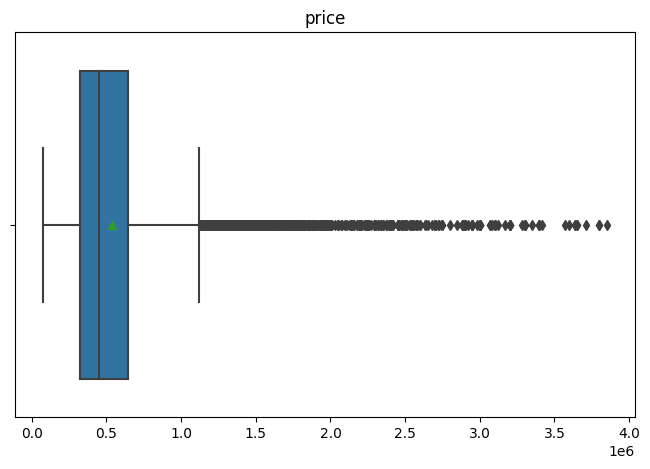

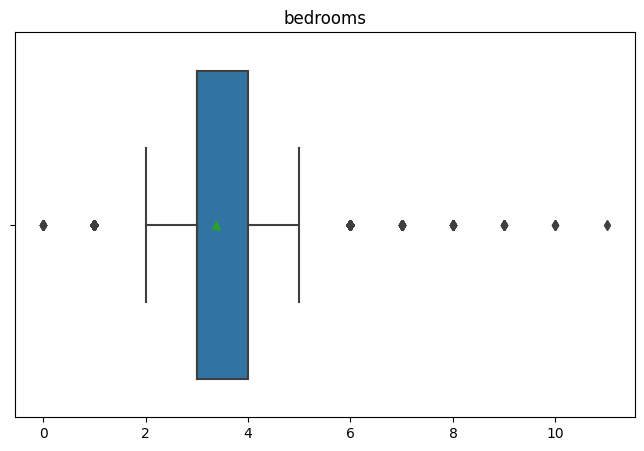

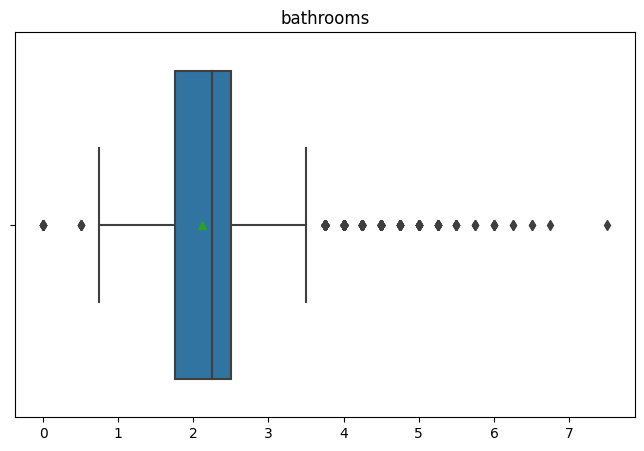

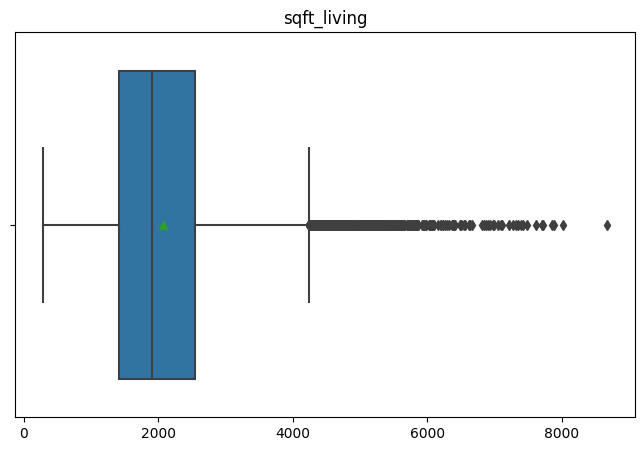

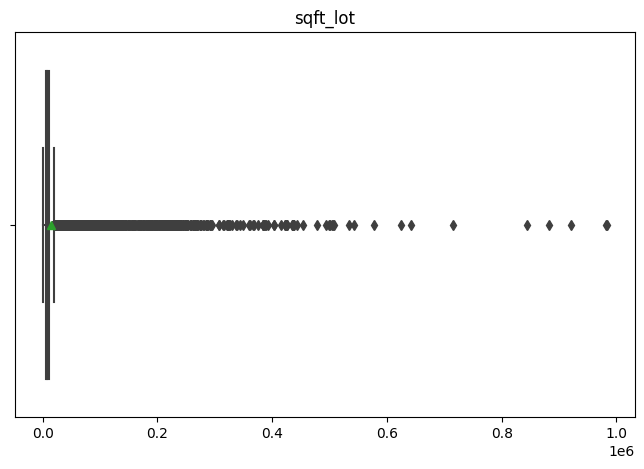

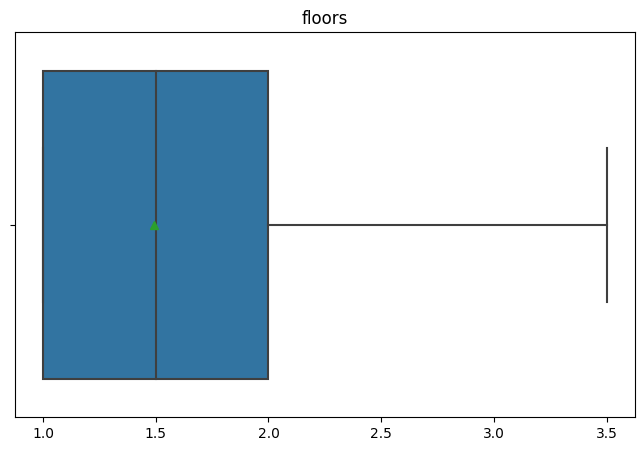

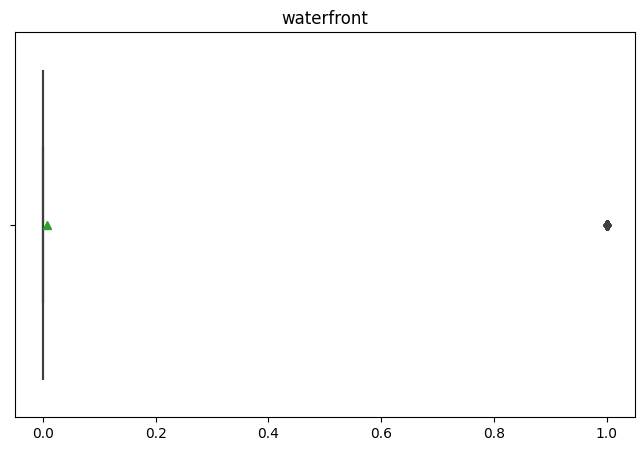

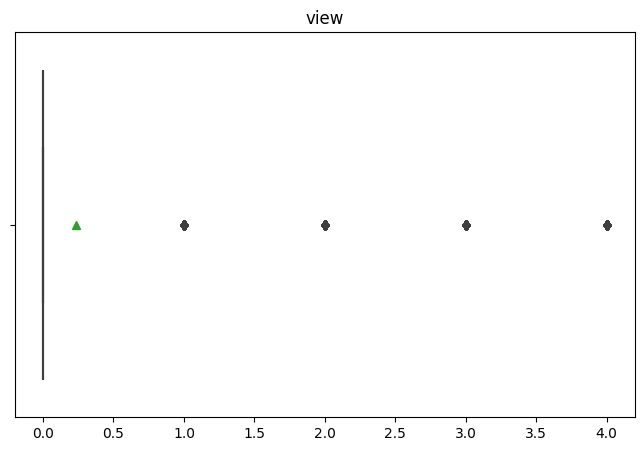

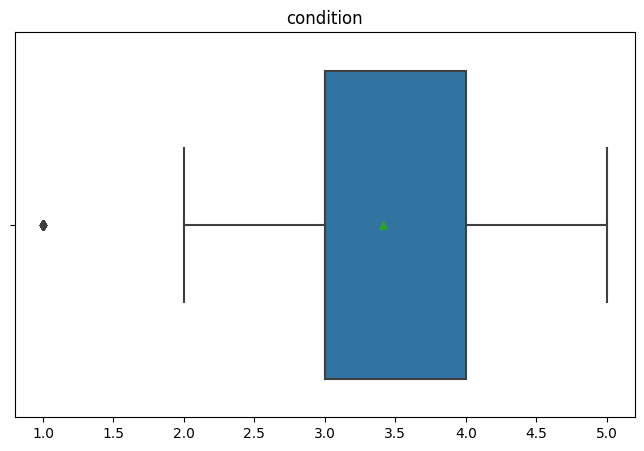

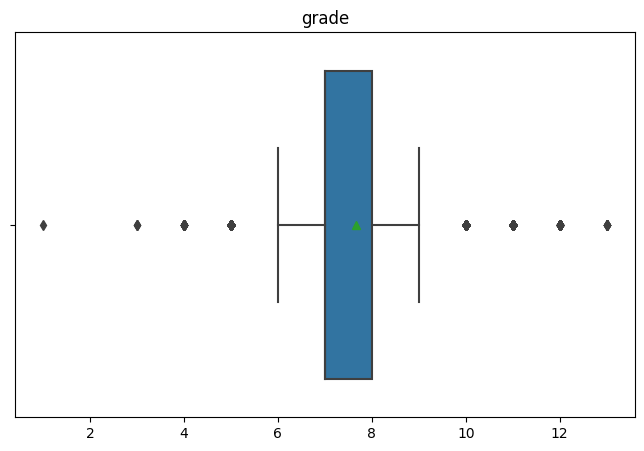

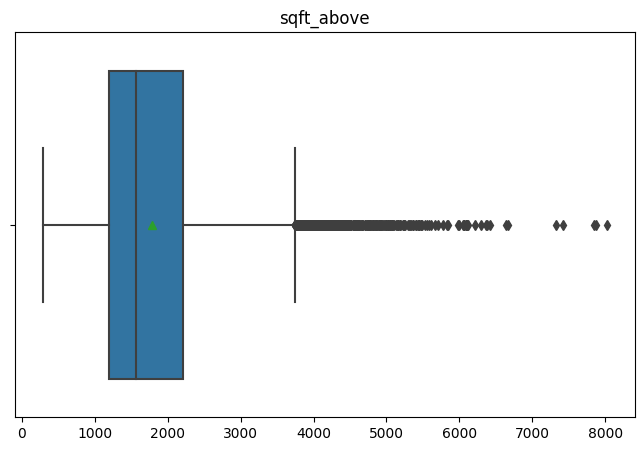

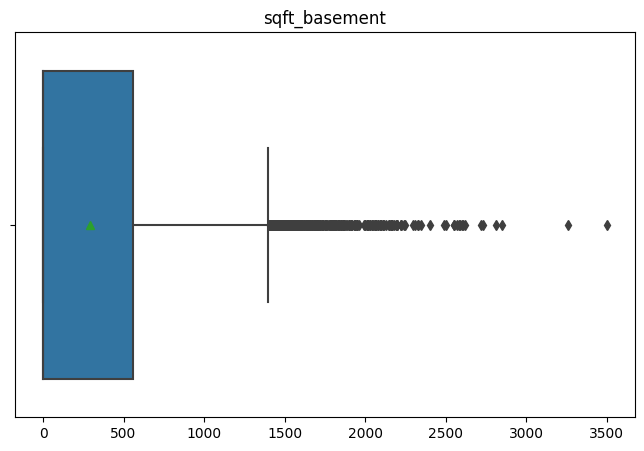

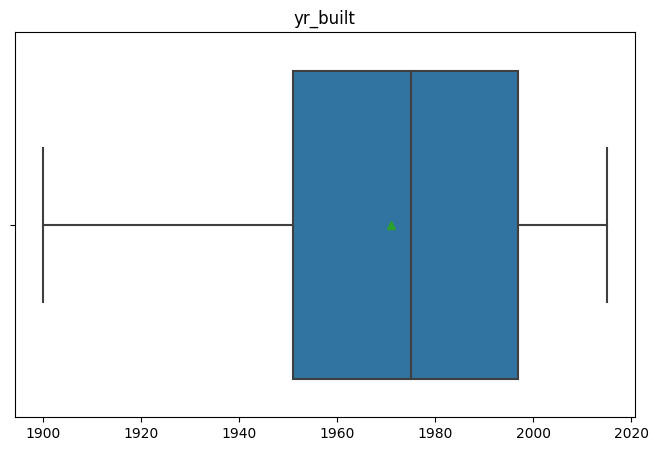

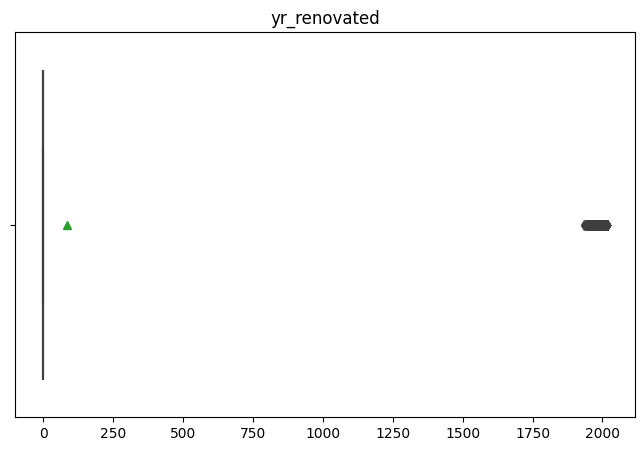

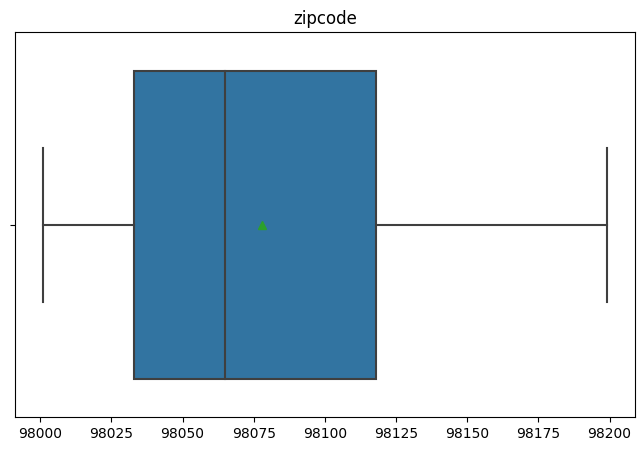

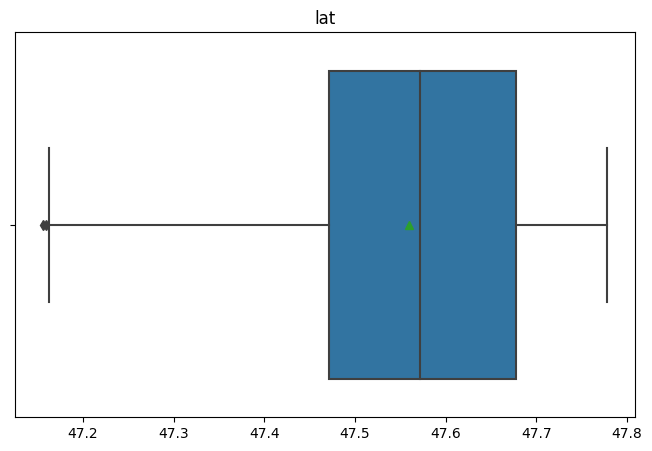

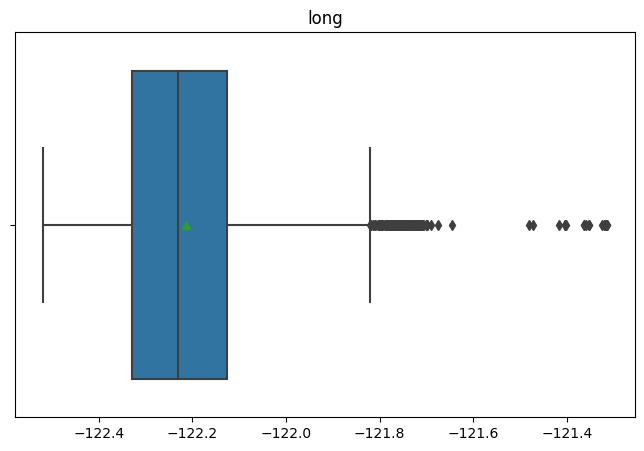

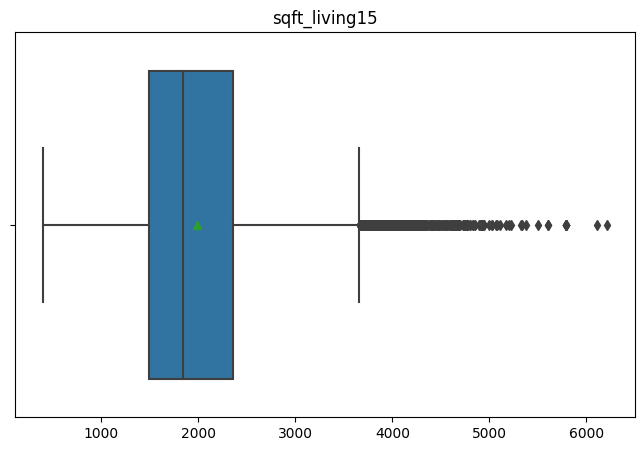

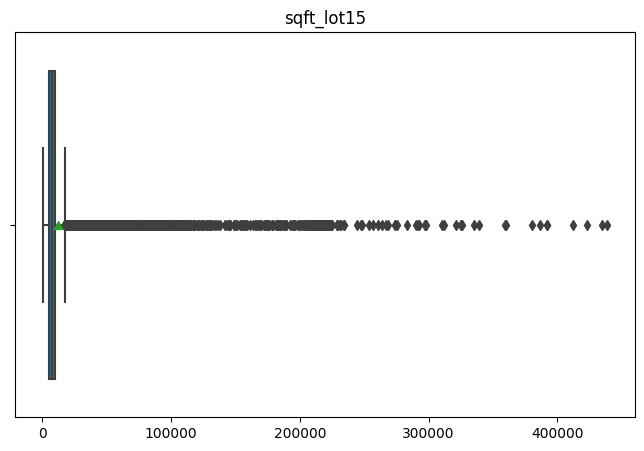

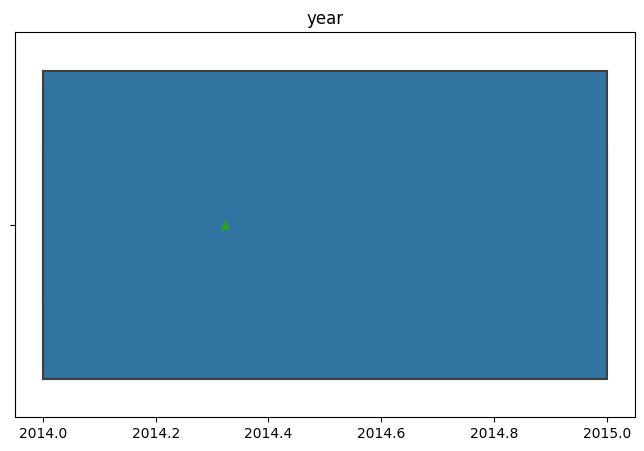

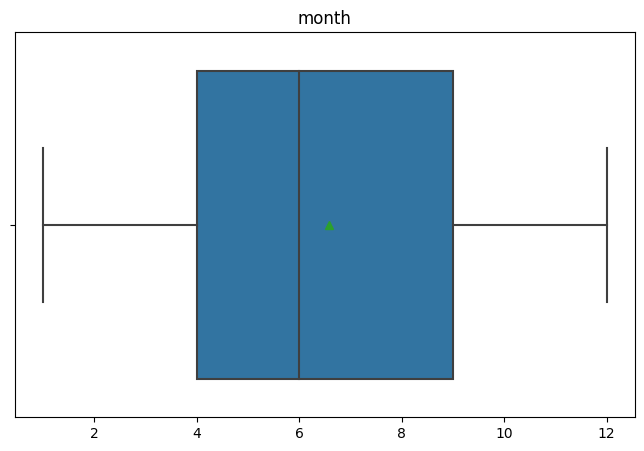

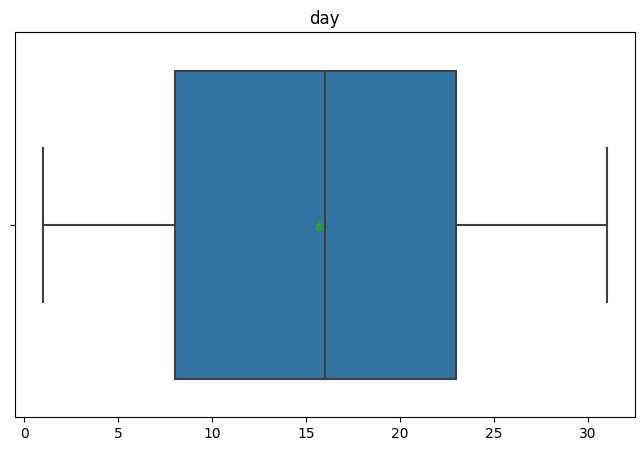

In [ ]:
#Plotting box plots to check distribution
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
numerical_columns = house_price.select_dtypes(include=['float64', 'int64']).columns
# Set the size of the individual plots
plot_width, plot_height = 8, 5

# Loop through each numerical column and create boxplot
for col in numerical_columns:
    plt.figure(figsize=(plot_width, plot_height))
    sns.boxplot(data=house_price, x=col, showmeans=True)
    plt.title(col)
    plt.xlabel('')
    plt.show()

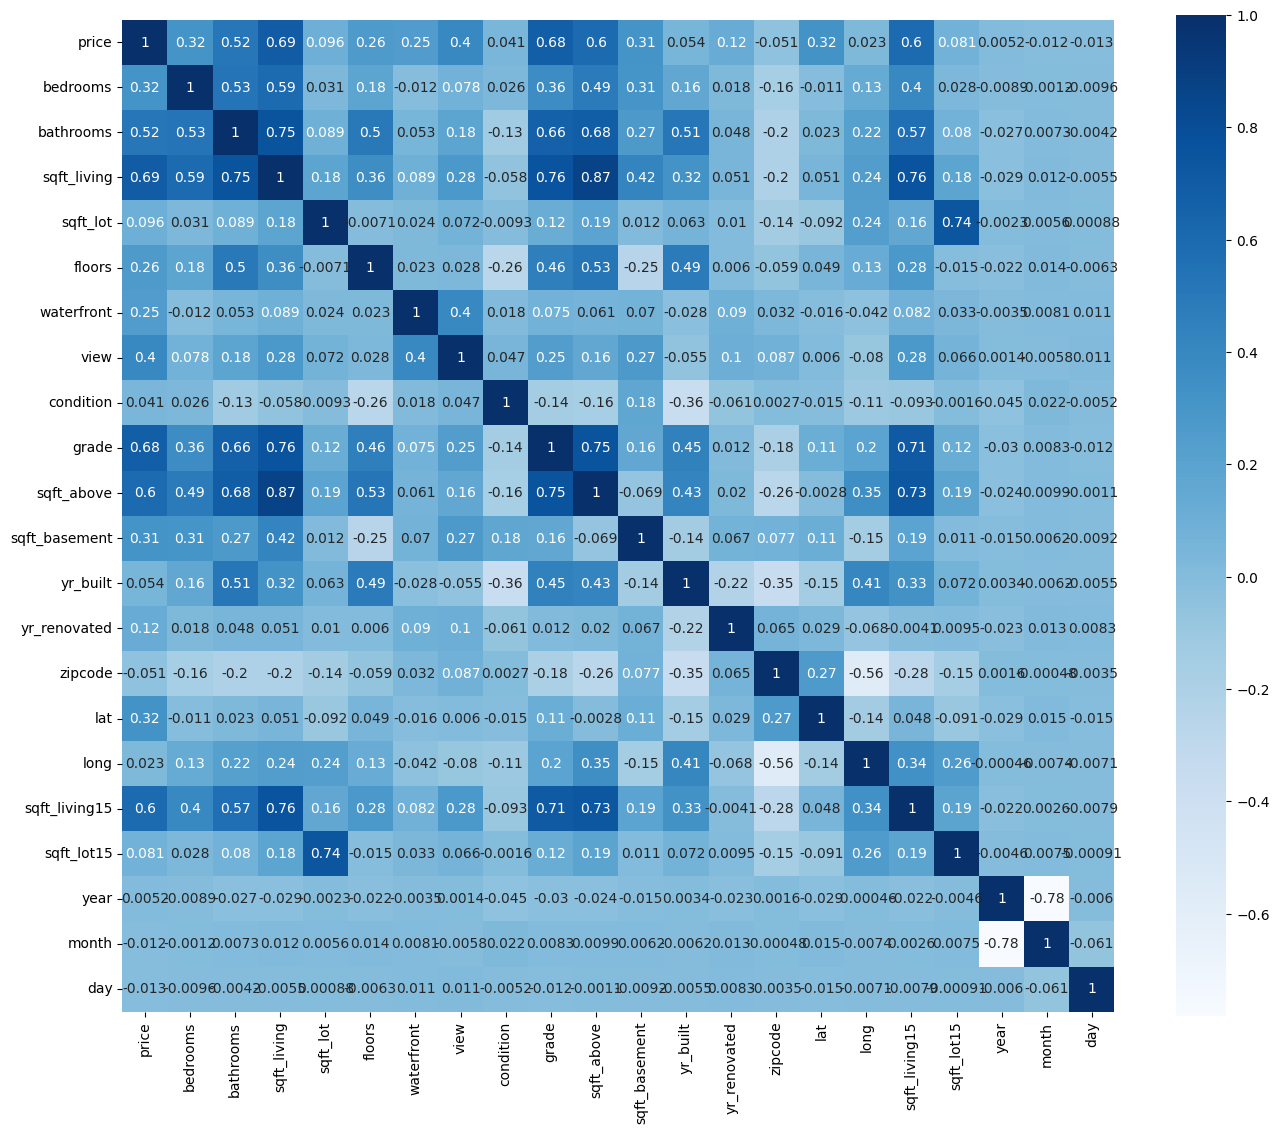

In [ ]:
#Plotting correlation matrix to identify highly correlated attributes
plt.figure(figsize=(16,13))
sns.heatmap(house_price.corr(), square=True, cmap='Blues', annot=True)
plt.show()

In [ ]:
#Checking VIF to remove predictors with VIF greater than 5

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = house_price.drop(columns=['price'])
y = house_price['price']

# Add a constant term (intercept) to the data
data_with_constant = add_constant(X)

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Variable"] = data_with_constant.columns
vif["VIF"] = [variance_inflation_factor(data_with_constant.values, i) for i in range(data_with_constant.shape[1])]

print(vif)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


         Variable           VIF
0           const  5.334078e+07
1        bedrooms  1.719743e+00
2       bathrooms  3.313347e+00
3     sqft_living           inf
4        sqft_lot  2.270044e+00
5          floors  2.018998e+00
6      waterfront  1.199720e+00
7            view  1.429937e+00
8       condition  1.254194e+00
9           grade  3.407139e+00
10     sqft_above           inf
11  sqft_basement           inf
12       yr_built  2.431032e+00
13   yr_renovated  1.150380e+00
14        zipcode  1.663190e+00
15            lat  1.182702e+00
16           long  1.829429e+00
17  sqft_living15  3.016814e+00
18     sqft_lot15  2.292363e+00
19           year  2.614260e+00
20          month  2.613966e+00
21            day  1.012622e+00


In [ ]:
house_price = house_price.drop(columns=['sqft_basement','sqft_above','sqft_living15'])

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = house_price.drop(columns=['price'])
y = house_price['price']

# Add a constant term (intercept) to the data
data_with_constant = add_constant(X)

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Variable"] = data_with_constant.columns
vif["VIF"] = [variance_inflation_factor(data_with_constant.values, i) for i in range(data_with_constant.shape[1])]

print(vif)

        Variable           VIF
0          const  5.302194e+07
1       bedrooms  1.718860e+00
2      bathrooms  3.225912e+00
3    sqft_living  4.332435e+00
4       sqft_lot  2.254811e+00
5         floors  1.615159e+00
6     waterfront  1.197773e+00
7           view  1.364310e+00
8      condition  1.242565e+00
9          grade  3.023389e+00
10      yr_built  2.427911e+00
11  yr_renovated  1.146701e+00
12       zipcode  1.645724e+00
13           lat  1.165307e+00
14          long  1.718499e+00
15    sqft_lot15  2.279702e+00
16          year  2.613880e+00
17         month  2.613585e+00
18           day  1.012333e+00


<a id = "cell_model"></a>
## 3. Predictive Modeling

a) Regression Models

For the regression models, the size of training set for the models is 15114 and the size of validation set is 6478 based on the splitting in the ratio 70:30. Neural network models need the data in the array format, thus the dataframe is converted into array for neural network models.  


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
#!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Nadam, RMSprop, Adam, Adadelta
from tensorflow.keras.callbacks import EarlyStopping

#Setting price as label and splitting the dataset into training and validation set in ratio 70:30
label_col='price'
train_size, valid_size, test_size = (0.7, 0.3, 0.0)
house_train, house_valid = train_test_split(house_price,
                                      test_size=valid_size,
                                      random_state=1)

In [ ]:
house_y_train = house_train[[label_col]]
house_x_train = house_train.drop(label_col, axis=1)
house_y_valid = house_valid[[label_col]]
house_x_valid = house_valid.drop(label_col, axis=1)

print('Size of training set: ', len(house_x_train))
print('Size of validation set: ', len(house_x_valid))
#Using minmax scaler to scale the training dataset
scaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(house_x_train)
house_x_train = pd.DataFrame(scaler.transform(house_x_train),
                            columns = house_x_train.columns, index = house_x_train.index)
house_x_valid = pd.DataFrame(scaler.transform(house_x_valid),
                            columns = house_x_valid.columns, index = house_x_valid.index)

print('X train min =', round(house_x_train.min().min(),4), '; max =', round(house_x_train.max().max(), 4))
print('X valid min =', round(house_x_valid.min().min(),4), '; max =', round(house_x_valid.max().max(), 4))

Size of training set:  15114
Size of validation set:  6478
X train min = 0.0 ; max = 1.0
X valid min = -0.0001 ; max = 1.1111


In [ ]:
# Defining the sets in the form of arrays for the neural network model
arr_x_train = np.array(house_x_train)
arr_y_train = np.array(house_y_train)
arr_x_valid = np.array(house_x_valid)
arr_y_valid = np.array(house_y_valid)

print('Training shape:', arr_x_train.shape)
print('Training samples: ', arr_x_train.shape[0])
print('Validation samples: ', arr_x_valid.shape[0])

Training shape: (15114, 18)
Training samples:  15114
Validation samples:  6478


The performance metrics for the linear regression model showed that the r-squared is 0.72 that is 72% variation in the sale price can be predicted by the model predictors. This is a moderate predictive power of a predictive model and if this is a real world dataset, 72% is also good enough. The Root mean squared error came out to be 186000 which means that the predicted value of sale price for a property on an average deviates by 186000 dollars compared to the actual price.

In [ ]:
#Linear Regression Model for prediction
model = LinearRegression()

# Fit the model on the training data
model.fit(house_x_train, house_y_train)

house_y_pred = model.predict(house_x_valid)

#Calculating RMSE and MSE
rmse = mean_squared_error(house_y_valid, house_y_pred, squared=False)
mse = mean_squared_error(house_y_valid, house_y_pred)

#R-squared (Coefficient of Determination) on the test data
r_squared = r2_score(house_y_valid, house_y_pred)

# Evaluation Metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (Coefficient of Determination): {r_squared:.2f}")


Root Mean Squared Error (RMSE): 186012.68
Mean Squared Error (MSE): 34600716726.55
R-squared (Coefficient of Determination): 0.72


The neural network model for regression is developed with four hidden layers having 100, 180, 256 and 20 nodes each, and with tanh activation function for first two hidden layers and relu activation function for other two hidden layers. Dropout layers are used which drop 20% of nodes to avoid overfitting and Nadam optimiser is used for optimisation with learning_rate=0.002. Early stopping is used based on 'val_loss' with patience=10, that is training will continue for 10 additional epochs even after the validation loss has stopped improving and 'restore_best_weights=true' will restore the weights to the best model validation loss. Epochs=500 means the model will run for 500 iterations but may stop early. The number of parameters for the first hidden layer were 1900 because we have 18 input predictors and 100 nodes in the first dense layer, so, (18+1)X100=1900. Similarly, (100+1)X180=18180 for second hidden layer and (180+1)X180=32580 for third hidden layer and (180+1)x20=3620 for fourth hidden layer and (20+1)X1=21 for final output layer. The total trainable parameters are 56301 that is 1900+18180+32580+3620+21.

In [ ]:
def nn_model_reg(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(180, activation="tanh"))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(180, activation="relu"))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(20, activation="relu"))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer=Nadam(learning_rate=0.002),
        metrics=[metrics.mae])
    return t_model
model = nn_model_reg(arr_x_train.shape[1], arr_y_train.shape[1])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.summary()
history = model.fit(arr_x_train, arr_y_train,
    batch_size=64,
    epochs=500,
    shuffle=True,
    verbose=2,
    callbacks=[early_stopping],
    validation_data=(arr_x_valid, arr_y_valid))
train_score = model.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = model.evaluate(arr_x_valid, arr_y_valid, verbose=0)

print('Train MAE: ', round(train_score[1], 2), ', Train Loss: ', round(train_score[0], 2))
print('Val MAE: ', round(valid_score[1], 2), ', Val Loss: ', round(valid_score[0], 2))
y_valid_predict = model.predict(arr_x_valid)
r_squared = r2_score(arr_y_valid, y_valid_predict)
print(f"R-squared (Coefficient of Determination): {r_squared:.2f}")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               1900      
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 180)               18180     
                                                                 
 dropout_9 (Dropout)         (None, 180)               0         
                                                                 
 dense_14 (Dense)            (None, 180)               32580     
                                                                 
 dropout_10 (Dropout)        (None, 180)               0         
                                                                 
 dense_15 (Dense)            (None, 20)               

The value of R squared came out to be maximum 0.87 with validation MAE:76,000. That means the neural network model for regression could predict 87% variation in the sale price based on its predictors.

In [ ]:
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Validation '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.draw()
        plt.show()

    return

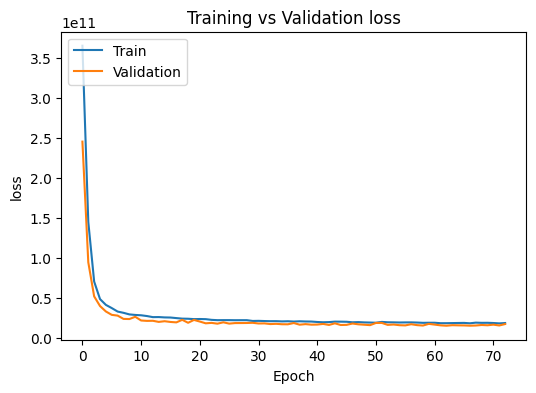

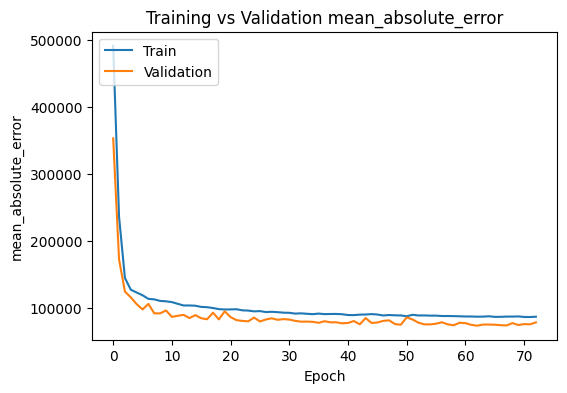

In [ ]:
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
hist = pd.DataFrame(history.history)
# Plot history
plot_hist(hist, xsize=6, ysize=4)

***b) Classification Models***

For the classification models, the property sales are classified as high price if the sale price is greater than 450,000 and as low price if sale price is lower than 450,000. Using the logistic regression model and similar data split in the ratio 70:30, the data is scaled and upsampled to remove class imbalance in the target label, 'price'. To remove the class imbalance SMOTE (synthetic minority over-sampling technique) is used otherwise prediction results would be biased. The training set has 15114 records and validation set has 6478 records. The model accuracy came out to be 84%, that means model correctly identifies the classes for 84% of the overall data inputs with 0.67 kappa. Kappa signifies that the model performance is not 'by chance' but is backed by logic behind it.


In [ ]:
#Setting price as 0 and 1 for low and high prices.
house_price['price'] = house_price['price'].apply(lambda x: 1 if x >= 450000 else 0)

label_col='price'
#Splitting the dataset into 70/30 training and validation sets
train_size, valid_size, test_size = (0.7, 0.3, 0.0)
house_train, house_valid = train_test_split(house_price,
                                      test_size=valid_size,
                                      random_state=1)
house_y_train = house_train[[label_col]]
house_x_train = house_train.drop(label_col, axis=1)
house_y_valid = house_valid[[label_col]]
house_x_valid = house_valid.drop(label_col, axis=1)

print('Size of training set: ', len(house_x_train))
print('Size of validation set: ', len(house_x_valid))
scaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(house_x_train)
house_x_train = pd.DataFrame(scaler.transform(house_x_train),
                            columns = house_x_train.columns, index = house_x_train.index)
house_x_valid = pd.DataFrame(scaler.transform(house_x_valid),
                            columns = house_x_valid.columns, index = house_x_valid.index)

print('X train min =', round(house_x_train.min().min(),4), '; max =', round(house_x_train.max().max(), 4))
print('X valid min =', round(house_x_valid.min().min(),4), '; max =', round(house_x_valid.max().max(), 4))

Size of training set:  15114
Size of validation set:  6478
X train min = 0.0 ; max = 1.0
X valid min = -0.0001 ; max = 1.1111


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Creating Logistic Regression model
model = LogisticRegression(max_iter=100)

#To handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resample, y_resample = smote.fit_resample(house_x_train, house_y_train)

# Fit the model on the training data
model.fit(X_resample, y_resample)

# Make predictions on the test data
house_y_pred = model.predict(house_x_valid)

# Evaluate the model on the test data
accuracy_test = accuracy_score(house_y_valid, house_y_pred)
print(f"Accuracy on Test Data: {accuracy_test:.2f}")

# Compute Cohen's Kappa score on the test data
kappa_score_test = cohen_kappa_score(house_y_valid, house_y_pred)
print(f"Cohen's Kappa Score on Test Data: {kappa_score_test:.2f}")

# Print classification report and confusion matrix for the test data
print("Classification Report for Test Data:")
print(classification_report(house_y_valid, house_y_pred))
print("Confusion Matrix for Test Data:")
print(confusion_matrix(house_y_valid, house_y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on Test Data: 0.84
Cohen's Kappa Score on Test Data: 0.67
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      3218
           1       0.84      0.83      0.84      3260

    accuracy                           0.84      6478
   macro avg       0.84      0.84      0.84      6478
weighted avg       0.84      0.84      0.84      6478

Confusion Matrix for Test Data:
[[2712  506]
 [ 552 2708]]


The neural network model for classification is developed with three hidden layers having 100, 180 and 256 nodes each, and relu activation function for the 3 hidden layers. With three dropout layers dropping 20% of the nodes each and Nadam optimiser is used for optimisation with learning_rate=0.005. The final layer consists of 2 nodes with softmax activation function. The model is run for 100 epochs but may stop early because early stopping is implemented. Early stopping is used based on 'val_loss' with patience=10, that is training will continue for 10 additional epochs after the validation loss has stopped decreasing and restore_best_weights=true will restore the weights to the best model validation loss. The number of parameters were 1900 for the first layer because we have 18 input predictors and 100 nodes in dense layer, so, (18+1)X100=1900. Similarly, for second layer, (100+1)X180= 18180, for the third layer, (180+1)X256=46336 and for final output layer (256+1)X2=514. The total trainable parameters are 66930 that is 1900+18180+46336+514. The results came out to be 90% accuracy of the model to predict the class of the price label and 0.8 kappa.

In [ ]:
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

print('Train shape: x=', arr_x_train.shape, ', y=', arr_y_train.shape)
print('Test shape: x=', arr_x_valid.shape, ', y=', arr_y_valid.shape)
arr_x_train = np.array(house_x_train)
arr_y_train = np.array(house_y_train)
arr_x_valid = np.array(house_x_valid)
arr_y_valid = np.array(house_y_valid)

# convert class vectors to binary class matrices
arr_y_train = to_categorical(arr_y_train, 2)
arr_y_valid = to_categorical(arr_y_valid, 2)

def nn_model():
    t_model = Sequential()
    t_model.add(Dense(100, activation="relu", input_shape=(18,)))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(180, activation="relu"))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(256, activation="relu"))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(2, activation='softmax'))
    t_model.summary()
    return(t_model)
model = nn_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.summary()
model.compile(optimizer=Nadam(learning_rate=0.005),
              loss=categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(arr_x_train, arr_y_train,
    batch_size=64,
    epochs=100,
    shuffle=True,
    verbose=2,
    callbacks=[early_stopping],
    validation_data=(arr_x_valid, arr_y_valid))

train_score = model.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = model.evaluate(arr_x_valid, arr_y_valid, verbose=0)

print('Train Accuracy: ', round(train_score[1], 2), ', Train Loss: ', round(train_score[0], 2))
print('Val Accuracy: ', round(valid_score[1], 2), ', Val Loss: ', round(valid_score[0], 2))

from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score


# Make predictions on the test set
y_pred = model.predict(arr_x_valid)

# Convert the predicted labels to continuous-multioutput format
y_pred_continuous = np.round(y_pred)

# Convert the predicted labels to multiclass format
y_pred_multiclass = np.argmax(y_pred, axis=1)
arr_y_valid = np.argmax(arr_y_valid, axis=1)

# Calculate the kappa score
kappa = cohen_kappa_score(arr_y_valid, y_pred_multiclass)
print("The result of Kappa is :", round(kappa, 3))

# Generate the classification report
report = classification_report(arr_y_valid, y_pred_multiclass)

# Print the report
print("The result of the classification report is: \n ",report)

Train shape: x= (15114, 18) , y= (15114, 1)
Test shape: x= (6478, 18) , y= (6478, 1)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 100)               1900      
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_18 (Dense)            (None, 180)               18180     
                                                                 
 dropout_12 (Dropout)        (None, 180)               0         
                                                                 
 dense_19 (Dense)            (None, 256)               46336     
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                   

<a id = "cell_report"></a>
## 4. Experiments Report

Experimental results of neural network models for regression:


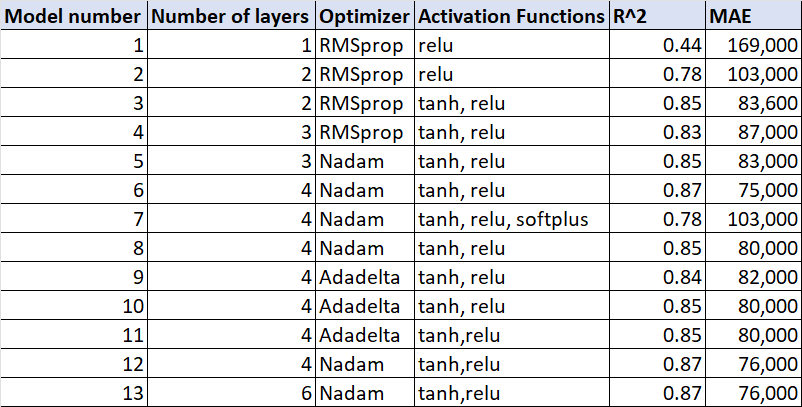

Experimental results of neural network models for classification:

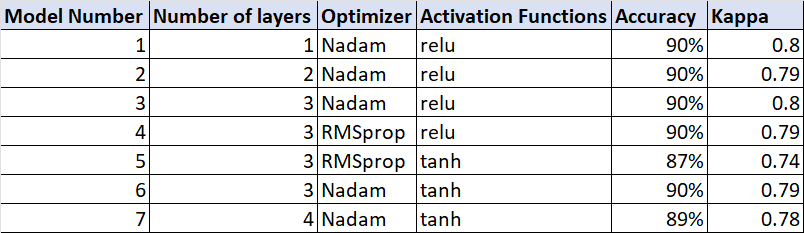

On the basis of various experiments performed on the regression and neural network models, following conclusions can be drawn:


1.   The neural network models perform a lot better compared to the traditional regression and classification models.
2. For the given house price dataset, and regression model, the optimum optimiser was Nadam with tanh and relu activation functions. Other optimisers were not giving better results. The optimum value of layers was 4. Any layers less than or greater than 4 lead to less accuracy in the results.
3. With the increase in number of nodes and hidden layers, it is not mandatory for the model performance to increase.
4. Prediction is more accurate while predicting classes of the house sale price (high or low) with 90% accuracy, compared to 87% prediction accuracy for regression models. This indicates, our models can correctly predict the sale price 87% of the times.

The conclusion that can be drawn from the analysis for the business is,


1.   The prediction of prices can be done with the help of attributes other than 'sqft_basement','sqft_above','sqft_living15' because the relationship of these attributes with the price is correctly identified by other attributes.
2.   The business can trust the accuracy of these models to predict the prices because 87% or 90% accuracy is very high, given the fluctuations in the market.



